In [1]:
from time import time
start_time = time()

### Imports, Load Data and inspect

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from libpysal.weights import Queen, Rook, KNN
from spopt.region.skater import Skater
import shapely
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import libpysal as ps
import esda
import math
from sklearn.metrics import pairwise as skm

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# BIG DATASET
# Split 1
#pth = r"Y:\Lukas\thesis\bus1123\data\split1\calhouses3310scat-train1-voro1.shp"
#test_p_pth = r"Y:\Lukas\thesis\bus1123\data\split1\calhouses3310scat-test1.shp"

# Split 2
#pth = r"Y:\Lukas\thesis\bus1123\data\split2\calhouses3310scat-train2-voro2.shp"
#test_p_pth = r"Y:\Lukas\thesis\bus1123\data\split2\calhouses3310scat-test2.shp"

# Split 3
#pth = r"Y:\Lukas\thesis\bus1123\data\split3\calhouses3310scat-train3-voro3.shp"
#test_p_pth = r"Y:\Lukas\thesis\bus1123\data\split3\calhouses3310scat-test3.shp"

# SMALL DATASET
# Split 1
pth = r"Y:\Lukas\thesis\bus1123\randomsample_houses\houses_random_2050_TRAIN-1_voro.shp"
test_p_pth = r"Y:\Lukas\thesis\bus1123\randomsample_houses\houses_random_2050_TEST-1_points.shp"

# Split 2
#pth = r"Y:\Lukas\thesis\bus1123\randomsample_houses\houses_random_2050_TRAIN-2_voro.shp"
#test_p_pth = r"Y:\Lukas\thesis\bus1123\randomsample_houses\houses_random_2050_TEST-2_points.shp"

# Split 3
#pth = r"Y:\Lukas\thesis\bus1123\randomsample_houses\houses_random_2050_TRAIN-3_voro.shp"
#test_p_pth = r"Y:\Lukas\thesis\bus1123\randomsample_houses\houses_random_2050_TEST-3_points.shp"


houses = gpd.read_file(pth)

In [5]:
houses.head(2)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry
0,142600.0,3.0992,9.0,3293.0,840.0,4.342857,1.065476,"POLYGON ((272734.822 -607559.551, 272046.019 -..."
1,96200.0,1.6007,21.0,1327.0,488.0,3.645492,0.954918,"POLYGON ((275235.497 -599843.782, 273503.882 -..."


In [6]:
houses.shape

(1640, 8)

In [7]:
houses.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MedHouseVa  1640 non-null   float64 
 1   MedIncome   1640 non-null   float64 
 2   MedianAge   1640 non-null   float64 
 3   Population  1640 non-null   float64 
 4   Households  1640 non-null   float64 
 5   roomsperHH  1640 non-null   float64 
 6   bedroomHH   1640 non-null   float64 
 7   geometry    1640 non-null   geometry
dtypes: float64(7), geometry(1)
memory usage: 102.6 KB


### SKATER Regionalization

In [8]:
houses.shape

(1640, 8)

In [9]:
attribute_name = ['MedHouseVa']

In [10]:
wq = Queen.from_dataframe(houses)
wq.n

C:\Users\lukasb97\AppData\Local\Temp\ipykernel_20352\266690351.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = Queen.from_dataframe(houses)


1640

In [11]:
n_clusters = 22
floor = 1

In [12]:
spanning_forest_kwds = dict(
    dissimilarity=skm.manhattan_distances,
    affinity=None,
    reduction=np.sum,
    center=np.mean,
    verbose=2)

In [13]:
trace = False
islands = "increase"

In [14]:
model = Skater(
    houses, 
    wq, 
    attribute_name, 
    n_clusters = n_clusters, 
    floor =  floor,
    trace = trace,
    islands = islands,
    spanning_forest_kwds = spanning_forest_kwds)

In [15]:
#%%time
model.solve()

Computing Affinity Kernel took 0.00s
Computing initial MST took 0.00s
Computing connected components took 0.00s.


<timed eval>:1: OptimizeWarning: By default, the graph is disconnected! Increasing `n_clusters` from 22 to 28 in order to account for islands.


finding cut...:   0%|          | 0/1634 [00:00<?, ?it/s]

making cut deletion(in_node=427, out_node=450, score=137201759.96080774)...


finding cut...:   0%|          | 0/1633 [00:00<?, ?it/s]

making cut deletion(in_node=917, out_node=919, score=126599755.96521792)...


finding cut...:   0%|          | 0/1632 [00:00<?, ?it/s]

making cut deletion(in_node=1471, out_node=1473, score=114744348.19990142)...


finding cut...:   0%|          | 0/1631 [00:00<?, ?it/s]

making cut deletion(in_node=1187, out_node=1281, score=111495827.10287091)...


finding cut...:   0%|          | 0/1630 [00:00<?, ?it/s]

making cut deletion(in_node=795, out_node=825, score=107883959.85829613)...


finding cut...:   0%|          | 0/1629 [00:00<?, ?it/s]

making cut deletion(in_node=172, out_node=180, score=104743972.11154863)...


finding cut...:   0%|          | 0/1628 [00:00<?, ?it/s]

making cut deletion(in_node=570, out_node=624, score=101736255.42857161)...


finding cut...:   0%|          | 0/1627 [00:00<?, ?it/s]

making cut deletion(in_node=1094, out_node=1125, score=99265971.16614015)...


finding cut...:   0%|          | 0/1626 [00:00<?, ?it/s]

making cut deletion(in_node=95, out_node=129, score=96905354.53860374)...


finding cut...:   0%|          | 0/1625 [00:00<?, ?it/s]

making cut deletion(in_node=603, out_node=615, score=94638508.60046448)...


finding cut...:   0%|          | 0/1624 [00:00<?, ?it/s]

making cut deletion(in_node=627, out_node=628, score=92641836.77980475)...


finding cut...:   0%|          | 0/1623 [00:00<?, ?it/s]

making cut deletion(in_node=271, out_node=290, score=90846889.90788987)...


finding cut...:   0%|          | 0/1622 [00:00<?, ?it/s]

making cut deletion(in_node=995, out_node=1012, score=89216356.7873572)...


finding cut...:   0%|          | 0/1621 [00:00<?, ?it/s]

making cut deletion(in_node=424, out_node=425, score=87679645.74569376)...


finding cut...:   0%|          | 0/1620 [00:00<?, ?it/s]

making cut deletion(in_node=419, out_node=451, score=86279357.85023227)...


finding cut...:   0%|          | 0/1619 [00:00<?, ?it/s]

making cut deletion(in_node=1494, out_node=1495, score=84916941.88254198)...


finding cut...:   0%|          | 0/1618 [00:00<?, ?it/s]

making cut deletion(in_node=1134, out_node=1139, score=83699414.16472442)...


finding cut...:   0%|          | 0/1617 [00:00<?, ?it/s]

making cut deletion(in_node=1083, out_node=1087, score=82627290.75243518)...


finding cut...:   0%|          | 0/1616 [00:00<?, ?it/s]

making cut deletion(in_node=348, out_node=676, score=81663467.78233312)...


finding cut...:   0%|          | 0/1615 [00:00<?, ?it/s]

making cut deletion(in_node=710, out_node=743, score=80581622.78826061)...


finding cut...:   0%|          | 0/1614 [00:00<?, ?it/s]

making cut deletion(in_node=1248, out_node=1286, score=79659407.0023436)...


finding cut...:   0%|          | 0/1613 [00:00<?, ?it/s]

making cut deletion(in_node=1480, out_node=1486, score=78740432.50117019)...
CPU times: total: 2min 16s
Wall time: 2min 16s


In [16]:
column_name = f'skater_{n_clusters}'
print(column_name)

skater_22


In [17]:
houses[column_name] = model.labels_

In [18]:
houses.head(1)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22
0,142600.0,3.0992,9.0,3293.0,840.0,4.342857,1.065476,"POLYGON ((272734.822 -607559.551, 272046.019 -...",0


<Axes: >

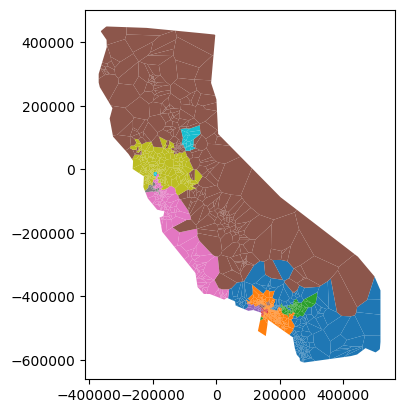

In [19]:
houses.plot(column=column_name, categorical=True)

In [20]:
pd.set_option('display.max_rows', 28)
houses['number'] = 1
houses[[column_name,'number']].groupby(by=column_name).count()

,number
skater_22,
0,221
1,17
2,21
3,318
4,20
5,16
6,1
7,1
8,93


In [21]:
single_object_clusters = houses[houses[column_name].apply(lambda x: houses[column_name].value_counts()[x] == 1)]

In [22]:
single_object_clusters

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22,number
251,500001.0,11.9993,31.0,1490.0,577.0,8.324090,0.996534,"POLYGON ((141110.223 -464274.079, 147762.867 -...",6,1
256,500001.0,5.0106,33.0,1647.0,931.0,4.290011,1.063373,"POLYGON ((141439.112 -462683.531, 147985.207 -...",7,1
478,500001.0,7.1674,26.0,1322.0,666.0,5.307808,1.123123,"POLYGON ((144209.354 -438323.227, 143066.098 -...",12,1
487,500001.0,14.2867,49.0,850.0,318.0,7.603774,0.946541,"POLYGON ((141599.297 -438664.816, 138816.663 -...",13,1
1102,500001.0,8.6963,33.0,727.0,271.0,5.926199,0.937269,"POLYGON ((-198399.925 -65433.776, -198647.892 ...",20,1


In [23]:
# Iterate over single-object clusters
for index, cluster in single_object_clusters.iterrows():
    cluster_geometry = cluster.geometry
    
    neighboring_clusters = houses[houses.geometry.touches(cluster_geometry)]
    
    biggest_cluster = neighboring_clusters[neighboring_clusters[column_name].apply(lambda x: houses[column_name].value_counts()[x] > 1)].sort_values(by=column_name, ascending=False).iloc[0]
    
    houses.at[index, column_name] = biggest_cluster[column_name]

In [24]:
single_object_clusters = houses[houses[column_name].apply(lambda x: houses[column_name].value_counts()[x] == 1)]

In [25]:
# no more left
single_object_clusters

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22,number


In [26]:
pd.set_option('display.max_rows', 40)
houses['number'] = 1
houses[[column_name,'number']].groupby(by=column_name).count()

,number
skater_22,
0,221
1,17
2,21
3,318
4,20
5,18
8,93
9,16
10,15


### Choose best model, then only keep necessary columns

In [27]:
houses.head(1)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22,number
0,142600.0,3.0992,9.0,3293.0,840.0,4.342857,1.065476,"POLYGON ((272734.822 -607559.551, 272046.019 -...",0,1


In [28]:
keepcolumns = ['MedHouseVa', 'MedIncome', 'MedianAge', 'Population', 'Households', 'roomsperHH', 'bedroomHH', 'geometry', 
               'skater_22']
houses = houses.loc[:, keepcolumns]
houses.head(1)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22
0,142600.0,3.0992,9.0,3293.0,840.0,4.342857,1.065476,"POLYGON ((272734.822 -607559.551, 272046.019 -...",0


## Spatial join the test data

In [29]:
test_p = gpd.read_file(test_p_pth)

In [30]:
test_p.head(2)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry
0,55000.0,1.6071,27.0,587.0,231.0,4.190476,1.038961,POINT (-6223.359 -116314.796)
1,104200.0,2.1250,16.0,1077.0,520.0,5.046154,1.013462,POINT (60108.280 -192791.957)


In [31]:
test_p.shape

(411, 8)

<Axes: >

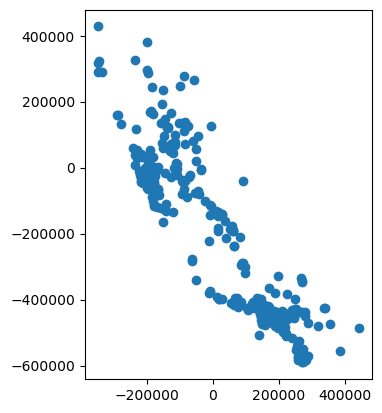

In [32]:
test_p.plot()

In [33]:
# temporary copy so just the columns wanted are in the join
temp_train_gdf = houses[['skater_22', 'geometry']].copy()

joined_gdf = gpd.sjoin(test_p, temp_train_gdf, how="left", op="within")
joined_gdf = joined_gdf.drop(columns=['index_right'])

# --> provides test data with cluster number

C:\Users\lukasb97\.conda\envs\test\Lib\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [34]:
houses.head(1)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22
0,142600.0,3.0992,9.0,3293.0,840.0,4.342857,1.065476,"POLYGON ((272734.822 -607559.551, 272046.019 -...",0


In [35]:
joined_gdf.head(1)

,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,skater_22
0,55000.0,1.6071,27.0,587.0,231.0,4.190476,1.038961,POINT (-6223.359 -116314.796),16


In [36]:
print(joined_gdf.shape)
print(houses.shape)

(411, 9)
(1640, 9)


<Axes: >

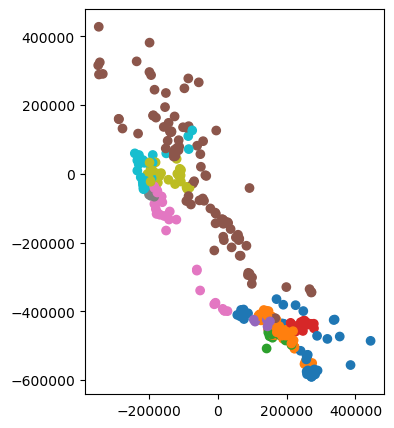

In [37]:
joined_gdf.plot(column='skater_22', categorical=True, figsize=(5,5), )

## Variable Definitions for RF models

In [38]:
X_train = houses.drop(["MedHouseVa", "geometry"], axis=1)
y_train = houses['MedHouseVa']

X_test = joined_gdf.drop(["MedHouseVa", "geometry"], axis=1)
y_test = joined_gdf['MedHouseVa']

In [39]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1640, 7)
Training Labels Shape: (1640,)
Testing Features Shape: (411, 7)
Testing Labels Shape: (411,)


In [41]:
np.unique(region_labels)

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 14, 15, 16, 17, 18, 19, 21,
       22, 23, 24, 25, 26, 27])

In [42]:
np.unique(region_labels_test)

array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 14, 15, 16, 17, 18, 19, 21, 22,
       23, 24, 25, 27])

In [43]:
param_dist = {
    'n_estimators': np.arange(50, 210, 10),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 12),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False]
}

In [44]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

## RegRF with Region Number as additional independent variable + HPO

In [45]:
#%%time
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=20, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
CPU times: total: 2.8 s
Wall time: 5.91 s


In [46]:
#%%time
hpo_rf = RandomForestRegressor(**random_search.best_params_, random_state=42, n_jobs=-1)
hpo_rf.fit(X_train, y_train)
predictions = hpo_rf.predict(X_test)

CPU times: total: 2.05 s
Wall time: 215 ms


In [47]:
# Calculate Evaluation Metrics
errors = abs(predictions - y_test)
print('MAE:', round(np.mean(errors), 2), 'units.')
r2 = round(r2_score(y_test, predictions), 3)
print("R2: ", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("RMSE: ", math.sqrt(mse))

MAE: 45631.07 units.
R2:  0.714
MSE:  3810824105.169126
RMSE:  61731.872684773836


### LISA

In [48]:
test_p['predictions'] = predictions.flatten()
test_p['y_test'] = y_test
test_p['test_res'] = test_p['y_test'] - test_p['predictions']

print(test_p.shape)
test_p.head(1)

(411, 11)


,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,predictions,y_test,test_res
0,55000.0,1.6071,27.0,587.0,231.0,4.190476,1.038961,POINT (-6223.359 -116314.796),90460.0,55000.0,-35460.0


<Axes: >

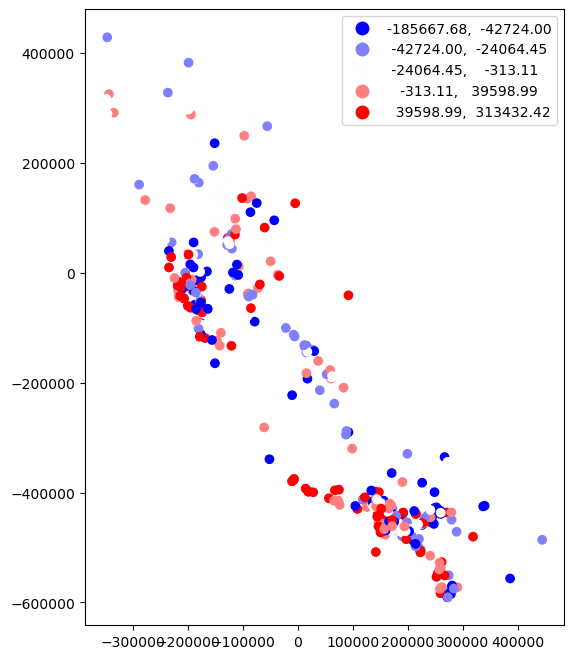

In [49]:
# plot residuals
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'aspect':'equal'})
test_p.plot(column='test_res', scheme='Quantiles', k=5, cmap='bwr', legend=True, ax=ax)

In [50]:
# new spatial weights for moran's I
wi = ps.weights.distance.KNN.from_dataframe(test_p, k=7) 
wi.transform = 'r'
y = test_p['test_res']

In [51]:
mi = esda.Moran(y, wi, permutations = 1000, two_tailed=False)
print( 'Moran I is', round(mi.I, 3), 'and p-value is', mi.p_sim, 'expected value is', mi.EI)

Moran I is 0.16 and p-value is 0.000999000999000999 expected value is -0.0024390243902439024


In [52]:
# Calculate LISA
lisa = esda.moran.Moran_Local(y, wi)

In [53]:
# Calculate spatial groupings and significance
test_p['Is'] = lisa.Is
test_p['pvalue'] = lisa.p_sim 
test_p['group'] = lisa.q 
test_p.loc[test_p['pvalue'] > 0.05, 'group'] = 'not-significant'
test_p.loc[test_p['group'] == 1, 'group'] = 'hotspot'
test_p.loc[test_p['group'] == 2, 'group'] = 'cold outlier'
test_p.loc[test_p['group'] == 3, 'group'] = 'coldspot'
test_p.loc[test_p['group'] == 4, 'group'] = 'hot outlier'
print(test_p ['group'].value_counts())
test_p.head(2)

group
not-significant    322
hotspot             36
coldspot            34
cold outlier        10
hot outlier          9
Name: count, dtype: int64


C:\Users\lukasb97\AppData\Local\Temp\ipykernel_20352\894966211.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'not-significant' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  test_p.loc[test_p['pvalue'] > 0.05, 'group'] = 'not-significant'


,MedHouseVa,MedIncome,MedianAge,Population,Households,roomsperHH,bedroomHH,geometry,predictions,y_test,test_res,Is,pvalue,group
0,55000.0,1.6071,27.0,587.0,231.0,4.190476,1.038961,POINT (-6223.359 -116314.796),90460.000000,55000.0,-35460.000000,0.352367,0.030,coldspot
1,104200.0,2.1250,16.0,1077.0,520.0,5.046154,1.013462,POINT (60108.280 -192791.957),89663.055556,104200.0,14536.944444,-0.056964,0.315,not-significant


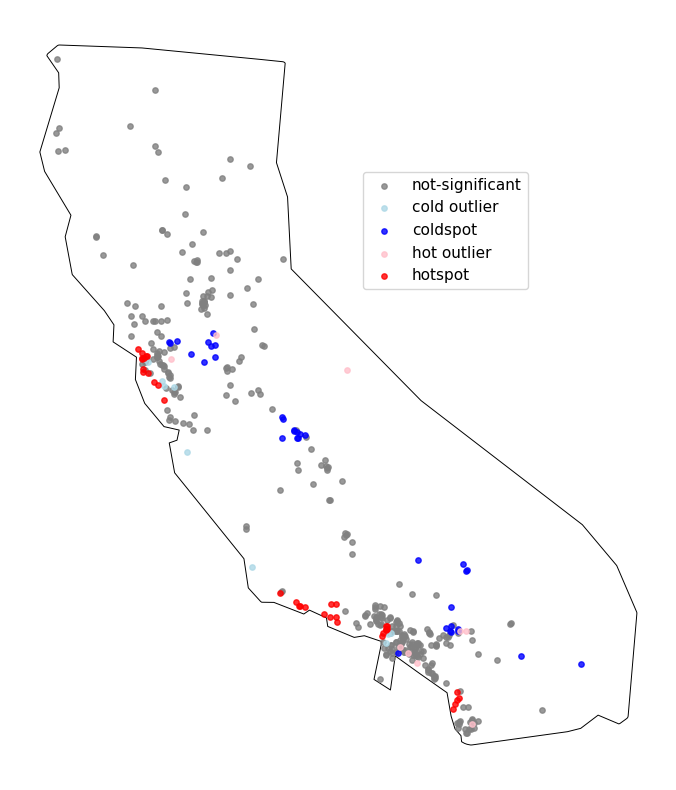

In [54]:
# Vizualize spatial groupings and significance
state_boundary = gpd.read_file(r"Y:/Lukas/thesis/bus1123/bufferedcliprahmen.shp")
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'aspect':'equal'})    

group_colors = {'not-significant': 'grey',
               'hotspot': 'red',
               'coldspot': 'blue',
               'cold outlier': 'lightblue',
               'hot outlier': 'pink'}

state_boundary.plot(ax=ax, edgecolor='black', linewidth=0.7, facecolor='none')

for ctype, data in test_p.groupby('group'):
    if ctype == 'not-significant':
        color = group_colors[ctype]
        data.plot(color=color, ax=ax, label=ctype, markersize=15, alpha=0.8)

for ctype, data in test_p.groupby('group'):
    if ctype != 'not-significant':
        color = group_colors[ctype]
        data.plot(color=color, ax=ax, label=ctype, markersize=15, alpha=0.8)

ax.legend(bbox_to_anchor=(0.8, 0.8), prop={'size': 11})

ax.set_axis_off()
save_path = r'Y:\Lukas\thesis\regionalization plots/lisa_skater_S1_small.png'
#plt.savefig(save_path)
plt.show()